In [1]:
#imports
import ugradio
import numpy as np
import matplotlib.pyplot as plt
from ugradio import timing

In [2]:
#loading data
def load_saves(filename):
    a = np.load(filename)
    return dict(zip(("{}".format(k) for k in a), (a[k] for k in a)))

def getdata(filename):
    '''Sorts a save to time and voltage arrays
    
    Inputs:
    filename: name of the file with data as a string
    
    Outputs:
    datat: array of times
    datav = array of voltages
    '''
    data = load_saves(filename)
    data = data['data']
    datav,datat = data[0],data[1]
    return datat,datav

In [3]:
t,v = getdata('../data/CygA_final.npz')

In [4]:
#Really, the only thing I look at is the plot of the filtered data. The three functions below define all of it

def getfft(t,v):
    '''Calculates the fourier transform of a voltage data set.
    Inputs:
    t = array of times
    v = array of voltages

    Outputs:
    freq = array of the corresponding frequencies
    power = array of the fourier transform'''
    trans = np.fft.fft(v)
    power = np.abs(trans)**2
    freq = np.fft.fftfreq(t.shape[-1])
    return freq, power, trans

def fftfilter(t,v):
    '''Filters out lowest 30 frequencies (positive and negative)
    
    Inputs: 
    t = array of times
    v = array of voltages
    
    Outputs:
    freq = array of frequencies
    trans = array of filtered, transformed data
    '''
    freq,power,trans = getfft(t,v)
    for i in range(0,30):
        trans[i] = 0
        trans[-i] = 0
    return freq, trans

def filterplot(t,v):
    '''
    '''
    freq,trans = fftfilter(t,v)
    filtered = np.fft.ifft(trans)
    power = np.abs(trans)**2

    plt.subplot(2,1,1)
    plt.plot(t,filtered)
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')

    plt.subplot(2,1,2)
    plt.plot(np.fft.fftshift(freq),np.fft.fftshift(power))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Arbitrary Unites (log(V$^2$))')

    plt.show()

C:\Users\Lukas\Anaconda3\envs\ay160\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


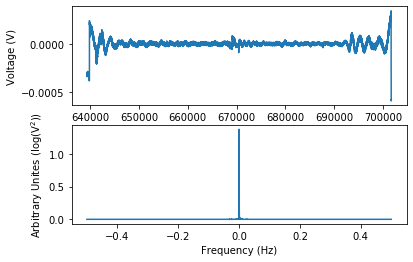

In [5]:
#now just plot
%matplotlib inline
filterplot(t,v)

In [6]:
# plotting unfiltered, just if its wanted

def getplot(t,v):
    #time = []
    #for i in range(len(t)):
    #    jd = ugradio.timing.julian_date(t[i])
    #    time.append(ugradio.timing.lst(jd))
    plt.plot(t,v)
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')

def dualplot(t,v):
    freq,power,trans = getfft(t,v)
    plt.subplot(2,1,1)
    getplot(t,v)

    plt.subplot(2,1,2)
    plt.plot(np.fft.fftshift(freq),np.fft.fftshift(power))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Arbitrary Unites (log(V$^2$))')

    plt.tight_layout()
    plt.show()

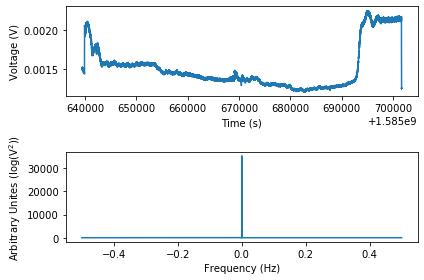

In [7]:
#for the plot
dualplot(t,v)